# EDA 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/slmsshk/DataSet/main/data_clean.csv',index_col=0)

In [3]:
data.Weather=data.Weather

# Data type conversion

In [4]:
data.Weather=data.Weather.astype('category') #int64
data.Weather.dtype

CategoricalDtype(categories=['C', 'PS', 'S'], ordered=False)

In [5]:
data.head()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C
3,12.0,149.0,12.6,74,5,3,2010,74,PS
4,18.0,313.0,11.5,62,5,4,2010,62,S
5,NaN,NaN,14.3,56,5,5,2010,56,S


In [6]:
data['Temp C'].value_counts()

81    11
76    10
82     9
77     8
86     7
78     6
79     6
67     5
73     5
75     5
80     5
92     5
87     5
85     5
84     5
83     4
68     4
57     3
71     3
72     3
69     3
61     3
74     3
90     3
93     3
66     3
88     3
94     2
91     2
89     2
70     2
62     2
64     2
65     2
59     2
58     2
97     1
C      1
96     1
63     1
56     1
Name: Temp C, dtype: int64

In [7]:
data['Temp C'].replace('C',81,inplace=True)

In [8]:
data.Month.value_counts()

9      34
5      31
7      31
8      31
6      30
May     1
Name: Month, dtype: int64

In [9]:
data.Month.replace('May',5,inplace=True)

In [10]:
data.Month=data['Month'].astype('int64')
data.Month.dtype

dtype('int64')

# Duplicates

In [11]:
data.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
154    False
155    False
156    False
157     True
158    False
Length: 158, dtype: bool

In [12]:
data.loc[157]

Ozone       14.0
Solar.R    191.0
Wind        14.3
Temp C        75
Month          9
Day           28
Year        2010
Temp          75
Weather        S
Name: 157, dtype: object

In [13]:
d1=data.drop_duplicates()

In [14]:
d1.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
153    False
154    False
155    False
156    False
158    False
Length: 157, dtype: bool

##  Drop Column

In [15]:
d1.columns

Index(['Ozone', 'Solar.R', 'Wind', 'Temp C', 'Month', 'Day', 'Year', 'Temp',
       'Weather'],
      dtype='object')

In [16]:
d2=d1.drop(['Temp C'],axis=1)

In [17]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 1 to 158
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    119 non-null    float64 
 1   Solar.R  150 non-null    float64 
 2   Wind     157 non-null    float64 
 3   Month    157 non-null    int64   
 4   Day      157 non-null    int64   
 5   Year     157 non-null    int64   
 6   Temp     157 non-null    int64   
 7   Weather  154 non-null    category
dtypes: category(1), float64(3), int64(4)
memory usage: 10.1 KB


In [18]:
d2=d1.drop(['Year'],axis=1)

In [19]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 1 to 158
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    119 non-null    float64 
 1   Solar.R  150 non-null    float64 
 2   Wind     157 non-null    float64 
 3   Temp C   157 non-null    object  
 4   Month    157 non-null    int64   
 5   Day      157 non-null    int64   
 6   Temp     157 non-null    int64   
 7   Weather  154 non-null    category
dtypes: category(1), float64(3), int64(3), object(1)
memory usage: 10.1+ KB


# Rename the columns

In [20]:
dit={'Solar.R':'Solar'}
d3=d2.rename(dit,axis=1)

In [21]:
d3

,Ozone,Solar,Wind,Temp C,Month,Day,Temp,Weather
1,41.0,190.0,7.4,67,5,1,67,S
2,36.0,118.0,8.0,72,5,2,72,C
3,12.0,149.0,12.6,74,5,3,74,PS
4,18.0,313.0,11.5,62,5,4,62,S
5,NaN,NaN,14.3,56,5,5,56,S
...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,68,9,30,68,S
154,41.0,190.0,7.4,67,5,1,67,C
155,30.0,193.0,6.9,70,9,26,70,PS
156,NaN,145.0,13.2,77,9,27,77,S


# Missing Values and Imputation

# Outlier Detection

<AxesSubplot:>

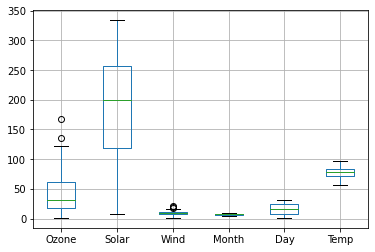

In [22]:
d3.boxplot()

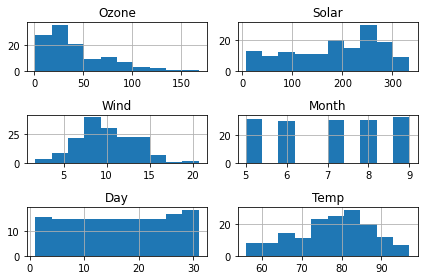

In [23]:
d3.hist()
plt.tight_layout()
plt.show()

In [24]:
d3.describe()

,Ozone,Solar,Wind,Month,Day,Temp
count,119.000000,150.000000,157.000000,157.000000,157.000000,157.000000
mean,41.815126,185.366667,9.929936,7.019108,15.929936,77.745223
std,32.659249,89.019146,3.505188,1.434338,8.974404,9.405334
min,1.000000,7.000000,1.700000,5.000000,1.000000,56.000000
25%,18.000000,118.500000,7.400000,6.000000,8.000000,72.000000
50%,31.000000,199.000000,9.700000,7.000000,16.000000,79.000000
75%,62.000000,257.500000,11.500000,8.000000,24.000000,84.000000
max,168.000000,334.000000,20.700000,9.000000,31.000000,97.000000


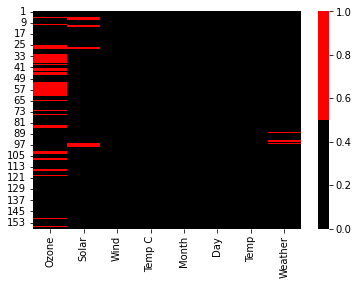

In [25]:
sns.heatmap(d3.isnull(),cmap=['black','red'])
plt.show()

In [26]:
d3.isnull().sum()

Ozone      38
Solar       7
Wind        0
Temp C      0
Month       0
Day         0
Temp        0
Weather     3
dtype: int64

In [27]:
(d3.isnull().sum()*100)/len(d3)

Ozone      24.203822
Solar       4.458599
Wind        0.000000
Temp C      0.000000
Month       0.000000
Day         0.000000
Temp        0.000000
Weather     1.910828
dtype: float64

In [28]:
d3['Ozone'].fillna(d3['Ozone'].median(),inplace=True)
d3

,Ozone,Solar,Wind,Temp C,Month,Day,Temp,Weather
1,41.0,190.0,7.4,67,5,1,67,S
2,36.0,118.0,8.0,72,5,2,72,C
3,12.0,149.0,12.6,74,5,3,74,PS
4,18.0,313.0,11.5,62,5,4,62,S
5,31.0,NaN,14.3,56,5,5,56,S
...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,68,9,30,68,S
154,41.0,190.0,7.4,67,5,1,67,C
155,30.0,193.0,6.9,70,9,26,70,PS
156,31.0,145.0,13.2,77,9,27,77,S


In [29]:
d3['Solar'].fillna(d3['Solar'].median(),inplace=True)
d3.isnull()

,Ozone,Solar,Wind,Temp C,Month,Day,Temp,Weather
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False,False


In [30]:
mde=d3['Weather'].mode()[0]
d3['Weather'].fillna(mde,inplace=True)
d3.isnull()

,Ozone,Solar,Wind,Temp C,Month,Day,Temp,Weather
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False,False


# Scatter plot and Correlation analysis

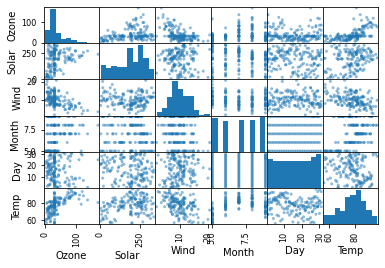

In [31]:
pd.plotting.scatter_matrix(d3)
plt.show()

In [32]:
d3.corr()

,Ozone,Solar,Wind,Month,Day,Temp
Ozone,1.000000,0.297561,-0.523738,0.171488,-0.031737,0.597087
Solar,0.297561,1.000000,-0.057709,-0.083788,-0.156243,0.256994
Wind,-0.523738,-0.057709,1.000000,-0.170328,0.029900,-0.441228
Month,0.171488,-0.083788,-0.170328,1.000000,0.041438,0.408060
Day,-0.031737,-0.156243,0.029900,0.041438,1.000000,-0.122787
Temp,0.597087,0.256994,-0.441228,0.408060,-0.122787,1.000000


# Transformations

## Dummy Variable

## Normalization of the data

# Speed up the EDA process

In [ ]:
# !pip install pandas-profiling==3.1.0
# !pip install sweetviz
!pip uninstall pandas-profiling

In [1]:
pip install pandas-profiling==2.13.0


Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Attempting uninstall: multimethod
    Found existing installation: multimethod 1.9
    Uninstalling multimethod-1.9:
      Successfully uninstalled multimethod-1.9
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 3.1.0
    Uninstalling pandas-profiling-3.1.0:
      Successfully uninstalled pandas-profiling-3.1.0


In [4]:
from pandas_profiling import ProfileReport

In [5]:
pp=ProfileReport(d3)

NameError: name 'd3' is not defined

In [6]:
pp.to_file(output_file='report2.html')

NameError: name 'pp' is not defined